**MeCab**

- NNG: 일반 명사

- NNP: 고유 명사

- NP: 대명사

- SL: 외국어

- SH: 한자

In [1]:
import pandas as pd
original = pd.read_csv('./dataset/패션아이템/TOP_ZIPUP_2019.txt', sep="\n",
                       engine='python', encoding="utf8")
df = original.dropna(axis=0).reset_index()
del(df['index'])
df.columns = ['text']
df

,text
0,나이키 배색반집업후리스\t봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: ...
1,어커버 하프집업후리스 :: HALF ZIP UP SILKY FLEECE\tHALF ...
2,[18DAY] 남미배낭여행 (볼리비아 라파즈 데스로드/킬리킬리 야경/라파즈...\t...
3,Made U] 스윗서브 후리스반집업후드-뽀글이 양털 후드티] 털날리는 것...\t상...
4,/choiroom/ 터틀 울 골지 원피스 니트 세트\t뒷면 초이룸의 베스트상품 함께...
...,...
95864,"[핫딜]블랙야크 여성반집업티셔츠 주황 5,000원\t주문은 링크타주세요. https..."
95865,"[핫딜]제이디엑스 JDX 여성 이중에리반집업티셔츠 네이비 9,000원\t주문은 링크..."
95866,[핫딜]제이디엑스 JDX 여성 이중에리반집업티셔츠 블랙 할인가 9...\t주문은 링...
95867,남성 폴로 면반집업니트 레드 70% 50000\tl xl 라지 기준 여유 105 5...


In [2]:
import time
Morph = []
run_time = []

In [3]:
from eunjeon import Mecab
mecab = Mecab()

POS_PASSWORD5 = ['NNG', 'NNP', 'NP', 'SL', 'SH']

In [4]:
def preprocess(string):
    rst = ""
    try:
        vocab_pos = mecab.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD5:
                rst = rst + key + " "
        return rst
    except:
        return None

In [5]:
ma_mecab = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    ma_mecab = ma_mecab.append({'text': preprocess(df['text'][i])},
                               ignore_index=True)
Morph.append('Mecab')
run_time.append(time.time()-start)
ma_mecab.head()

,text
0,나이키 배색 반집 업 후 리스 봉봉 빈티지 품명 나이키 배색 반집 업 후 리스 가격...
1,커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
2,DAY 남미 배낭 여행 볼리비아 라파 데스 로드 킬리 킬리 야경 라파 시간 반 이동...
3,Made U 스윗 서브 후 리스 반집 업 후드 글 양털 후드 티 털 상품명 Made...
4,choiroom 터틀 골지 원피스 니트 세트 뒷면 룸 베스트 상품 무배 반 폴라 기...


In [6]:
run_time

[351.9294493198395]

In [7]:
ma_mecab.to_csv("ma_mecab_result.csv", header=False, index=False)

In [8]:
temp = ma_mecab.values.tolist()
mecab_list = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        mecab_list.append(vocab)
series_mecab = pd.Series(mecab_list)
mecab_counts = series_mecab.value_counts()

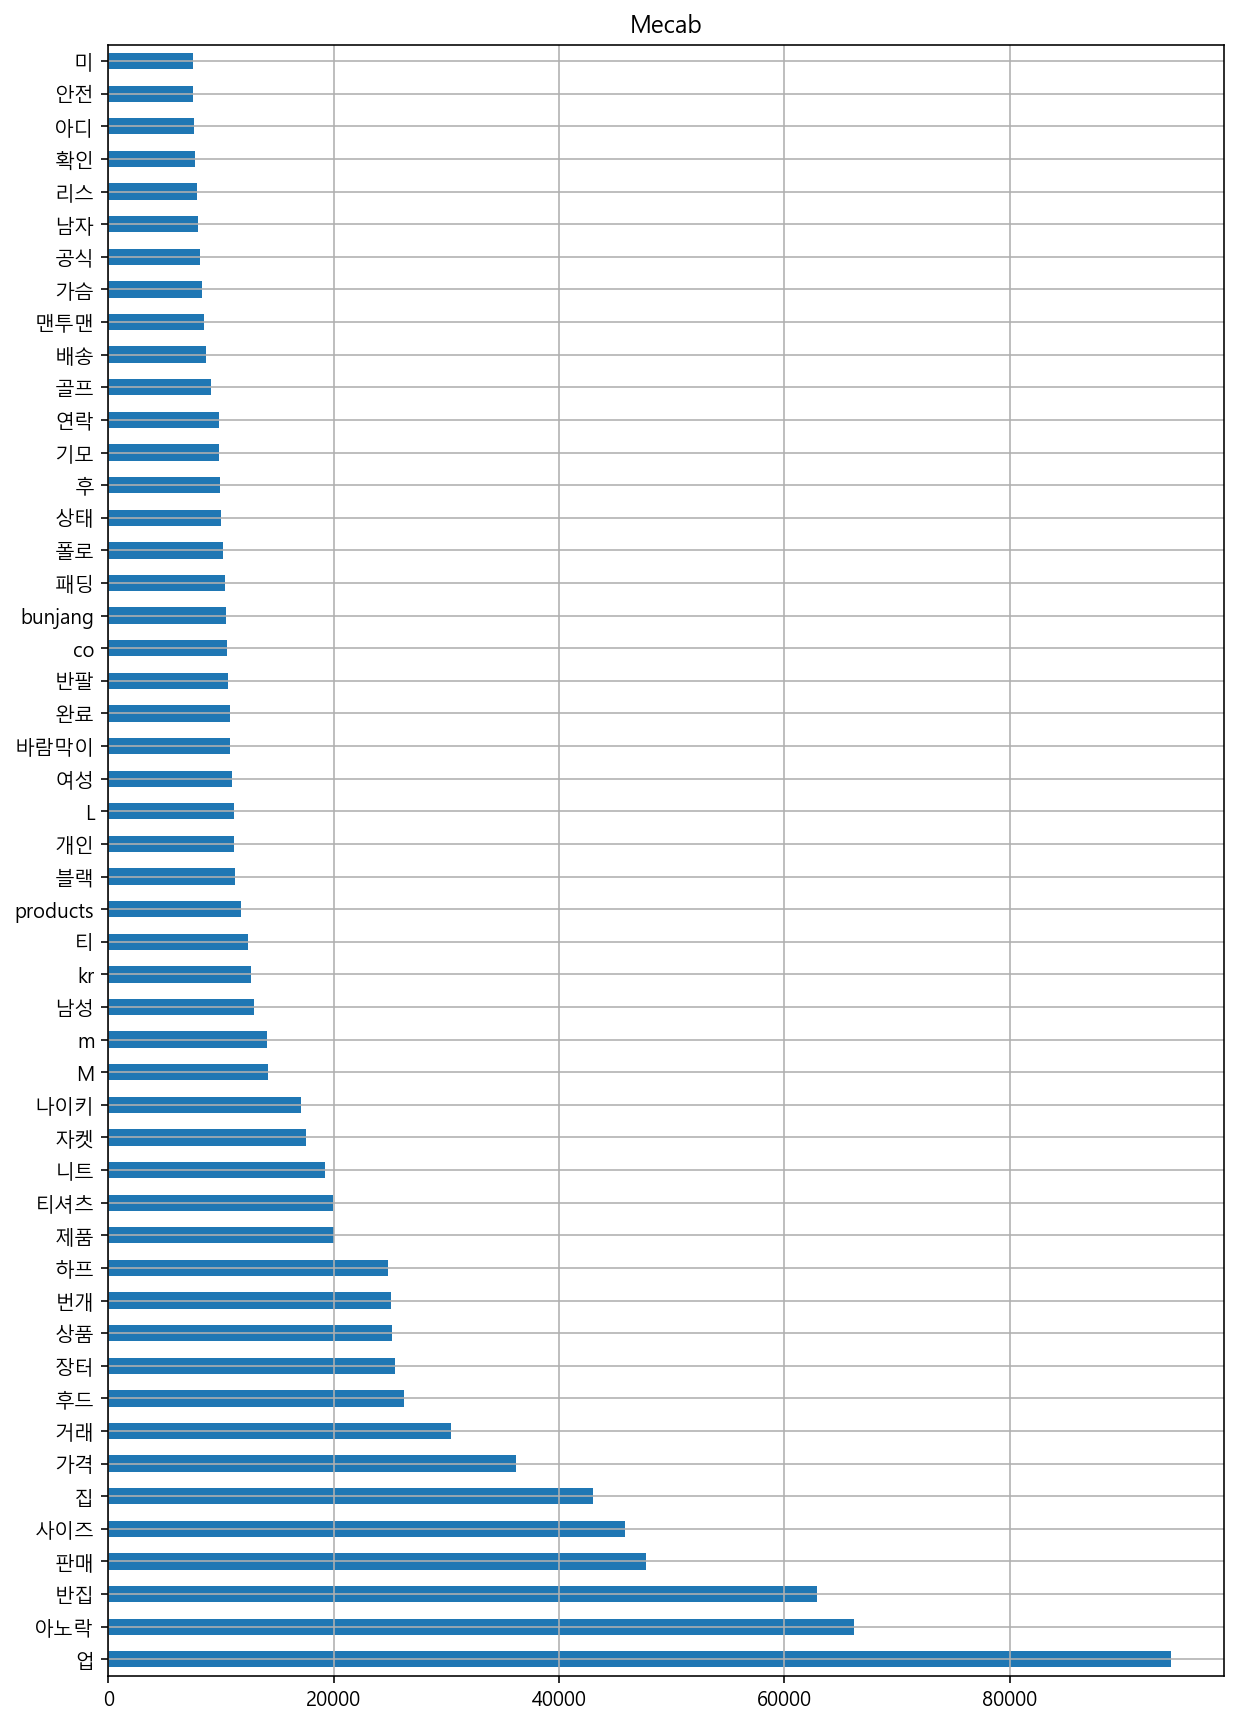

In [9]:
from IPython.display import set_matplotlib_formats
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font', family="Malgun Gothic")
set_matplotlib_formats('retina')
mecab_counts.head(50).plot(figsize=(10, 15),
                           kind='barh', grid=True, title='Mecab')